<a href="https://colab.research.google.com/github/JingchenYan1/Intro-to-ML/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kernel: linear
Best K: 2
Best Accuracy: 0.9912280701754386
Final Accuracy: 0.9385964912280702
Final Precision: 0.9848484848484849
Final Recall: 0.9154929577464789


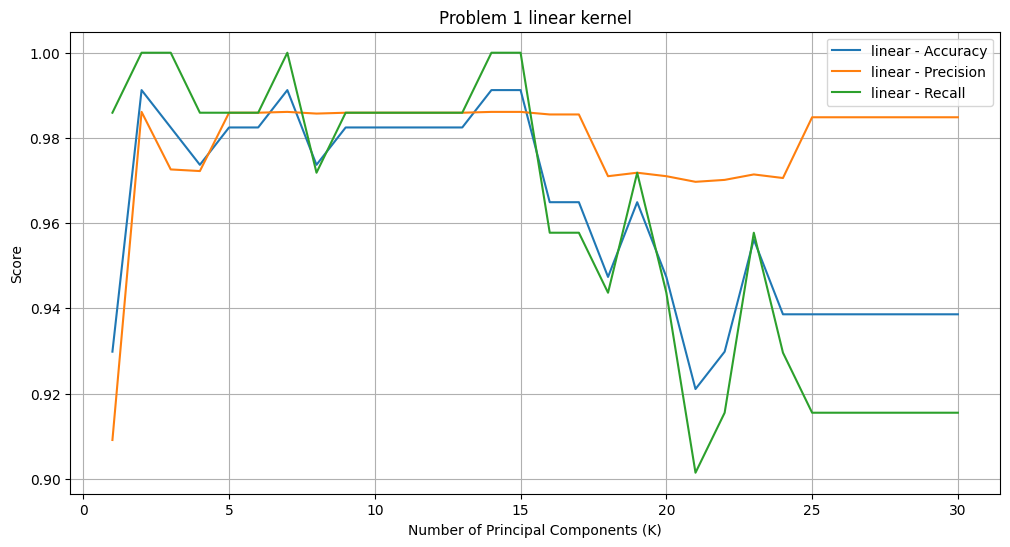

Kernel: rbf
Best K: 2
Best Accuracy: 0.9736842105263158
Final Accuracy: 0.9385964912280702
Final Precision: 0.9705882352941176
Final Recall: 0.9295774647887324


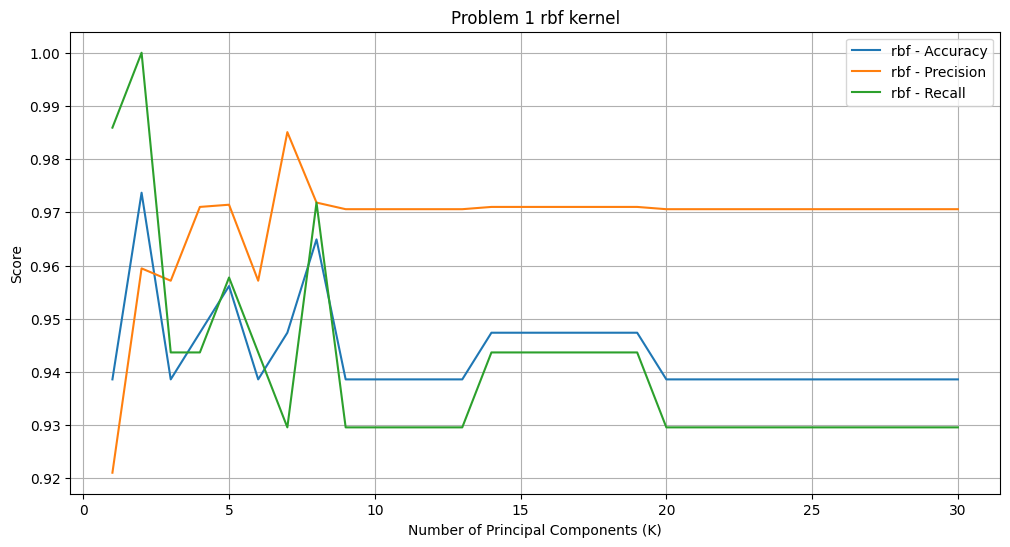

Kernel: poly
Best K: 3
Best Accuracy: 0.9649122807017544
Final Accuracy: 0.9385964912280702
Final Precision: 0.9444444444444444
Final Recall: 0.9577464788732394


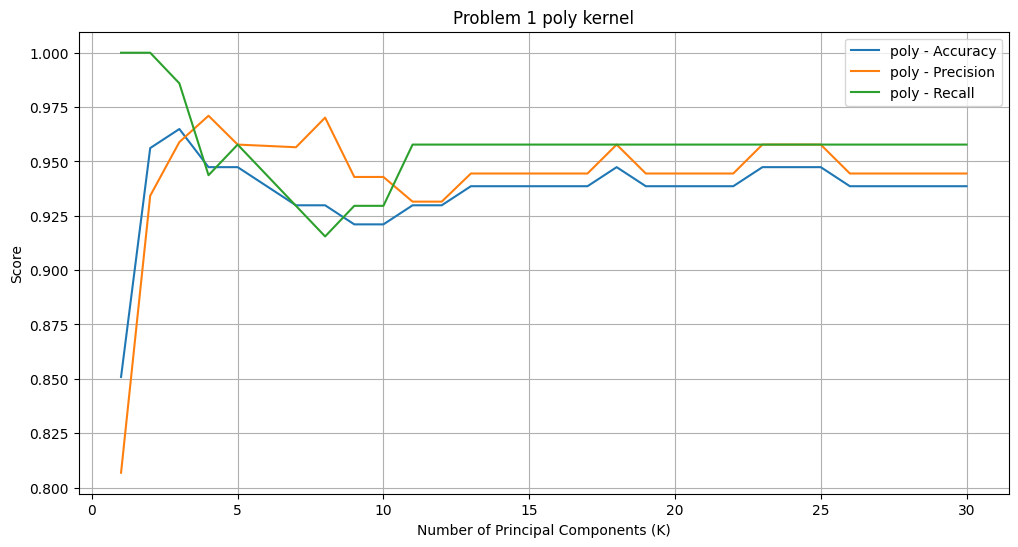

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

breast = load_breast_cancer()
breast_data = breast.data

breast_input = pd.DataFrame(breast_data)

breast_labels = breast.target

labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)

breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names

features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

y = breast_dataset['label']

X = breast_dataset.drop(columns=['label'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

kernels = ['linear', 'rbf', 'poly']
K_range = range(1, 31)
kernel_results = {}

for kernel in kernels:
    accuracies = []
    precisions = []
    recalls = []

    for K in K_range:
        pca = PCA(n_components=K)
        X_train_pca = pca.fit_transform(X_train)
        X_val_pca = pca.transform(X_val)

        model = SVC(kernel=kernel, C=1000)
        model.fit(X_train_pca, y_train)

        y_val_pred = model.predict(X_val_pca)

        accuracy = accuracy_score(y_val, y_val_pred)
        precision = precision_score(y_val, y_val_pred)
        recall = recall_score(y_val, y_val_pred)

        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)

    kernel_results[kernel] = {
        "accuracies": accuracies,
        "precisions": precisions,
        "recalls": recalls
    }

    optimal_K = K_range[np.argmax(accuracies)]
    best_accuracy = max(accuracies)
    plt.figure(figsize=(12, 6))
    plt.plot(K_range, accuracies, label=f'{kernel} - Accuracy')
    plt.plot(K_range, precisions, label=f'{kernel} - Precision')
    plt.plot(K_range, recalls, label=f'{kernel} - Recall')

    print(f'Kernel: {kernel}')
    print(f'Best K: {optimal_K}')
    print(f'Best Accuracy: {best_accuracy}')
    print(f'Final Accuracy: {accuracies[-1]}')
    print(f'Final Precision: {precisions[-1]}')
    print(f'Final Recall: {recalls[-1]}')

    plt.xlabel('Number of Principal Components (K)')
    plt.ylabel('Score')
    plt.title(f'Problem 1 {kernel} kernel')
    plt.legend()
    plt.grid(True)
    plt.show()

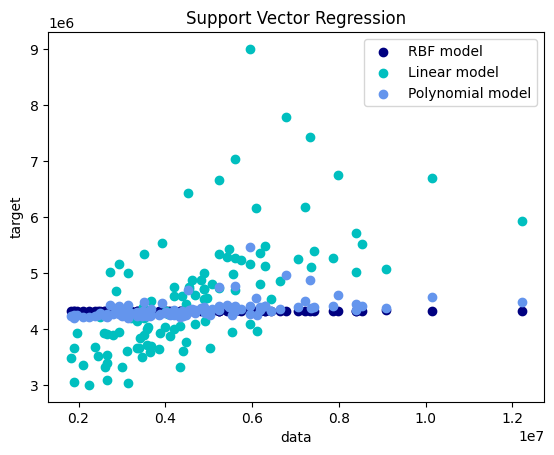

In [2]:
import numpy as np
import pandas as pd

# Data Visualisation

from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

file_path = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))

# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binary_map)

# Split training and test data
input_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
y_train = df_train.pop('price')
X_train = df_train[input_vars]
y_val = df_test.pop('price')
X_val = df_test[input_vars]


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_val)
y_lin = svr_lin.fit(X_train, y_train).predict(X_val)
y_poly = svr_poly.fit(X_train, y_train).predict(X_val)

plt.scatter(y_val, y_rbf, color='navy', label='RBF model')
plt.scatter(y_val, y_lin, color='c', label='Linear model')
plt.scatter(y_val, y_poly, color='cornflowerblue', label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

Kernel: rbf, K: 1, MSE: 3416850589859.1011
Kernel: rbf, K: 2, MSE: 3481004266452.4980
Kernel: rbf, K: 3, MSE: 3507831610481.5171
Kernel: rbf, K: 4, MSE: 3511866280394.3228
Kernel: rbf, K: 5, MSE: 3523825542584.8843
Kernel: rbf, K: 6, MSE: 3534140394008.6060
Kernel: rbf, K: 7, MSE: 3536909232861.4741
Kernel: rbf, K: 8, MSE: 3544062762813.3843
Kernel: rbf, K: 9, MSE: 3548959442150.3276
Kernel: rbf, K: 10, MSE: 3552114487786.0156
Kernel: rbf, K: 11, MSE: 3554900481980.2808


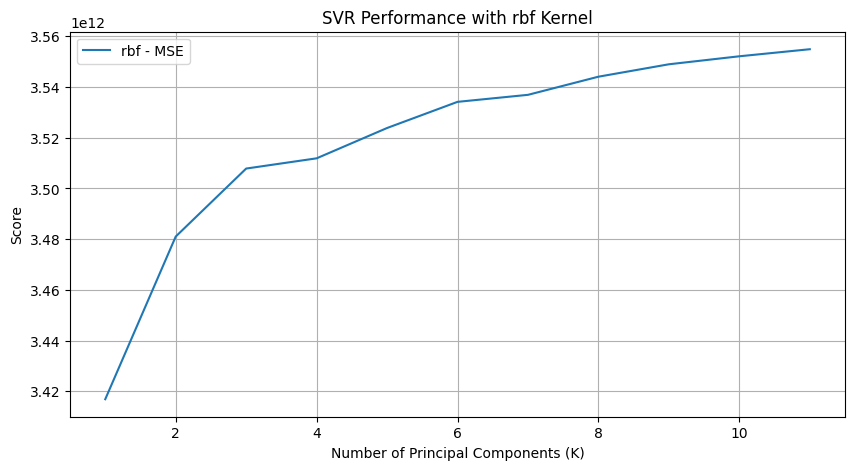

Kernel: rbf
Best K: 1
Best MSE: 3416850589859.101
Kernel: linear, K: 1, MSE: 2101473944257.5134
Kernel: linear, K: 2, MSE: 2111178986089.7034
Kernel: linear, K: 3, MSE: 2110587573981.2876
Kernel: linear, K: 4, MSE: 2110481507097.5388
Kernel: linear, K: 5, MSE: 2105185766004.8147
Kernel: linear, K: 6, MSE: 2123664386888.1953
Kernel: linear, K: 7, MSE: 2127146435575.4375
Kernel: linear, K: 8, MSE: 2116543842706.5842
Kernel: linear, K: 9, MSE: 2114577528402.1799
Kernel: linear, K: 10, MSE: 2117207495094.7454
Kernel: linear, K: 11, MSE: 2114425811917.1826


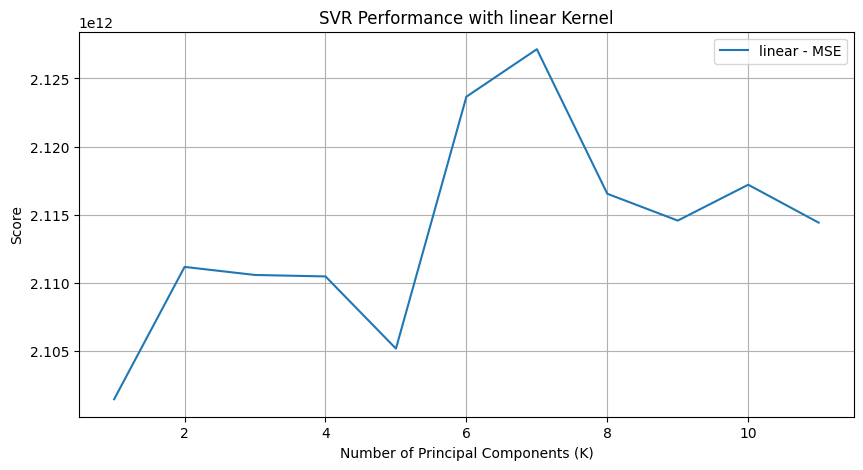

Kernel: linear
Best K: 1
Best MSE: 2101473944257.5134
Kernel: poly, K: 1, MSE: 1848719651629.6694
Kernel: poly, K: 2, MSE: 2332315124418.3213
Kernel: poly, K: 3, MSE: 2910437146825.2710
Kernel: poly, K: 4, MSE: 3184820463663.7334
Kernel: poly, K: 5, MSE: 3323480429478.1895
Kernel: poly, K: 6, MSE: 3391825862872.6738
Kernel: poly, K: 7, MSE: 3444402012394.7969
Kernel: poly, K: 8, MSE: 3477823882970.3750
Kernel: poly, K: 9, MSE: 3501646328351.2007
Kernel: poly, K: 10, MSE: 3520359599145.7896
Kernel: poly, K: 11, MSE: 3530776974921.9990


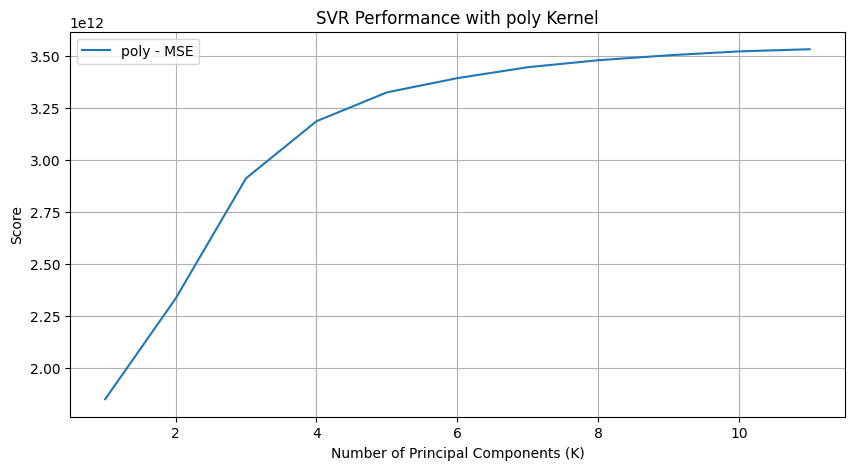

Kernel: poly
Best K: 1
Best MSE: 1848719651629.6694


In [5]:
from sklearn.metrics import mean_squared_error
kernels = ['rbf', 'linear', 'poly']
K_range = range(1, X_train.shape[1] + 1)
results = {}

for kernel in kernels:
    mse_values = []

    for K in K_range:
        pca = PCA(n_components=K)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_val_pca = pca.transform(X_val_scaled)
        model = SVR(kernel=kernel, C=1000, gamma='scale')  # 调整 C 值和 gamma
        model.fit(X_train_pca, y_train)

        y_val_pred = model.predict(X_val_pca)

        mse = mean_squared_error(y_val, y_val_pred)

        mse_values.append(mse)

        print(f'Kernel: {kernel}, K: {K}, MSE: {mse:.4f}')

    optimal_K = K_range[np.argmin(mse_values)]
    best_mse = min(mse_values)

    results[kernel] = {
        "mse_values": mse_values,
        "optimal_K": optimal_K,
        "best_mse": best_mse,
    }

    plt.figure(figsize=(10, 5))
    plt.plot(K_range, mse_values, label=f'{kernel} - MSE')
    plt.xlabel('Number of Principal Components (K)')
    plt.ylabel('Score')
    plt.title(f'SVR Performance with {kernel} Kernel')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f'Kernel: {kernel}')
    print(f'Best K: {optimal_K}')
    print(f'Best MSE: {best_mse}')